In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickthis

In [3]:
api = pickthis.API()
u = api.users()
list(filter(lambda i: '__' not in i, dir(u[3])))

['biography',
 'education',
 'email',
 'environment',
 'experience',
 'linkedin',
 'location',
 'nickname',
 'profession',
 'user_id']

In [4]:
api = pickthis.API()
i = api.images()
i[3].link

'http://lh3.googleusercontent.com/X3afQSpZp871wTlUctTViri02xJNGxlwcZKfCAJCvqlHQepgBqp0bnzuZbheoRQ8W1jml5_7z4IyvhXEBXo'

In [5]:
list(filter(lambda i: '__' not in i, dir(i[3])))

['challenge',
 'composite',
 'description',
 'heatmap',
 'height',
 'image',
 'image_id',
 'image_key',
 'link',
 'permission',
 'pickstyle',
 'preshow',
 'rightsholder',
 'title',
 'use_ab_test',
 'user',
 'width']

In [6]:
# import requests
# from PIL import Image
# from io import BytesIO
# r = requests.get(i[2].link)
# im = Image.open(BytesIO(r.content))

In [7]:
im = i[2].image()

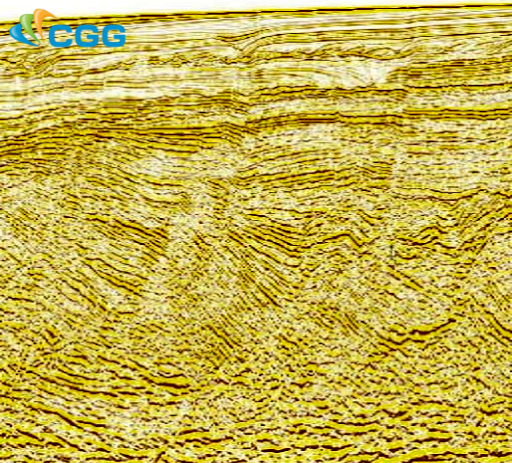

In [8]:
im

In [9]:
i[2].image_id

5491672892833792

In [11]:
img = i[2]
picks = api.picks(image_id=img.image_id)
picks[:5]

In [12]:
len(picks)  # Should be 31.

31

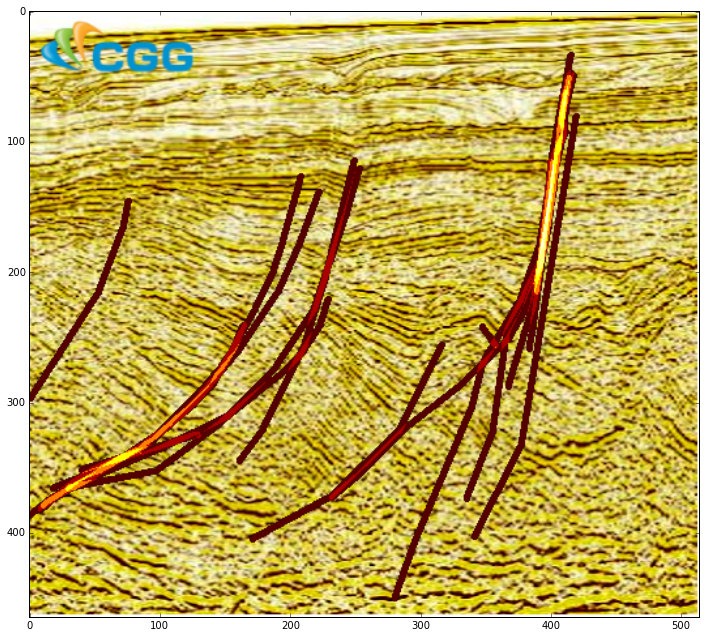

In [14]:
# Plot the image and 
plt.figure(figsize=(12,12))
plt.imshow(img.image())
plt.imshow(img.heatmap(picks, 1))
plt.show()

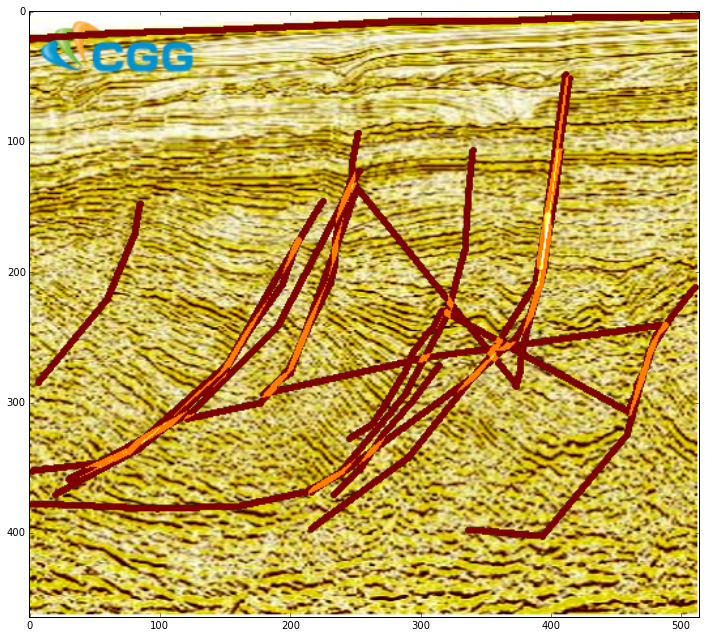

In [15]:
# Plot the image and 
plt.figure(figsize=(12,12))
plt.imshow(img.image())
plt.imshow(img.heatmap(picks, 2))
plt.show()

## Use Shapely to generate heatmap

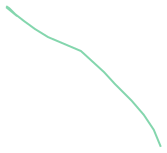

In [19]:
from shapely.geometry.linestring import LineString
from shapely.geometry.multilinestring import MultiLineString
ls = LineString(p4)
ls

In [12]:
p4[:15]  # Has line segment data in the 3rd dimension

[[164, 241, 0],
 [157, 258, 0],
 [147, 273, 0],
 [135, 287, 0],
 [118, 304, 0],
 [107, 316, 0],
 [84, 337, 0],
 [51, 351, 0],
 [38, 359, 0],
 [27, 367, 0],
 [9, 381, 0],
 [20, 372, 0],
 [12, 380, 0],
 [9, 382, 0]]

In [13]:
def turn_into_mls(row):

    r = np.array(row)
    these_lines = []

    groups = r[:,2]
    for group in set(groups):
        this_line = r[groups==group][:, :2]
        if len(this_line) > 1:
            these_lines.append(LineString(this_line))
        else:  # single point, discard
            continue

    return MultiLineString(these_lines)

In [14]:
picks_as_lines = picks['picks'].apply(turn_into_mls)
picks_as_lines

0     (LINESTRING (340 107, 337 136, 334 183, 320 23...
1     (LINESTRING (357 256, 347 242), LINESTRING (18...
2     (LINESTRING (253 121, 243 156, 218 229, 189 27...
3     (LINESTRING (510 212, 491 236, 475 262, 458 32...
4     (LINESTRING (164 241, 157 258, 147 273, 135 28...
5     (LINESTRING (20 371, 49 355, 84 336, 106 318, ...
6     (LINESTRING (410 63, 402 137, 386 226, 367 288...
7     (LINESTRING (0 387, 15 375, 40 362, 72 342, 10...
8     (LINESTRING (407 108, 403 141, 397 178, 392 20...
9     (LINESTRING (399 116, 399 128, 397 143, 391 18...
10    (LINESTRING (397 157, 398 166, 397 179, 395 19...
11    (LINESTRING (252 94, 247 120, 247 129, 244 138...
12    (LINESTRING (18 366, 54 352, 94 330, 127 300, ...
13    (LINESTRING (0 22, 58 18, 149 15, 218 12, 275 ...
14    (LINESTRING (316 256, 283 322, 230 373, 171 40...
15    (LINESTRING (415 48, 408 83, 411 93, 403 109, ...
16    (LINESTRING (415 34, 405 87, 400 115, 392 192,...
17    (LINESTRING (5 387, 48 359, 93 331, 111 31

In [15]:
import geopandas as gpd
all_picks = gpd.GeoSeries(picks_as_lines)
all_picks.buffer(5)

0     (POLYGON ((403.0447632208213 88.33226372828503...
1     (POLYGON ((497.3188945044922 252.5193551276204...
2     (POLYGON ((304.2144042000637 294.7216894031776...
3     (POLYGON ((487.0797708776912 232.8964852781722...
4     POLYGON ((4.026438738466859 381.4923472297112,...
5     (POLYGON ((476.3696104954317 265.4652710149894...
6     (POLYGON ((397.0478316458982 136.2880721106203...
7     (POLYGON ((-2.433587771483974 391.366436538687...
8     (POLYGON ((143.9292875792702 385.5444462702833...
9     POLYGON ((394 127.6681351239461, 392.053182360...
10    POLYGON ((367.4595989916291 252.3734339562787,...
11    (POLYGON ((407.105097901312 61.98022872943999,...
12    (POLYGON ((403.4171135041709 344.3769352643094...
13    (POLYGON ((-1.977120741452728 60.5869857815567...
14    (POLYGON ((462.0193396065006 299.7965992294305...
15    POLYGON ((403.0970966215454 82.01941932430908,...
16    (POLYGON ((400.0866917312576 86.07296070401088...
17    (POLYGON ((456.7164707312359 326.344823658

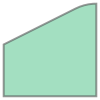

In [16]:
# imports used throughout this example
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations

# Here are your input shapes (circles A, B, C)
A = LineString([Point(5, 0), Point(5, 5)]).buffer(1)
B = LineString([Point(1, 3), Point(7, 3)]).buffer(1)
C = LineString([Point(2, 1), Point(6, 3)]).buffer(1)

# list the shapes so they are iterable
shapes = [A, B, C]

unioned = shapes[0].intersection(shapes[1])
for shape in shapes[2:]:
    unioned = unioned.intersection(shape)

unioned

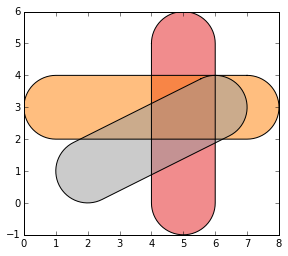

In [17]:
gpd.GeoSeries(shapes).plot()
plt.show()

In [18]:
g = gpd.GeoSeries(shapes)
g.intersects(g)

0    True
1    True
2    True
dtype: bool

In [19]:
all_picks

0     (LINESTRING (340 107, 337 136, 334 183, 320 23...
1     (LINESTRING (357 256, 347 242), LINESTRING (18...
2     (LINESTRING (253 121, 243 156, 218 229, 189 27...
3     (LINESTRING (510 212, 491 236, 475 262, 458 32...
4     (LINESTRING (164 241, 157 258, 147 273, 135 28...
5     (LINESTRING (20 371, 49 355, 84 336, 106 318, ...
6     (LINESTRING (410 63, 402 137, 386 226, 367 288...
7     (LINESTRING (0 387, 15 375, 40 362, 72 342, 10...
8     (LINESTRING (407 108, 403 141, 397 178, 392 20...
9     (LINESTRING (399 116, 399 128, 397 143, 391 18...
10    (LINESTRING (397 157, 398 166, 397 179, 395 19...
11    (LINESTRING (252 94, 247 120, 247 129, 244 138...
12    (LINESTRING (18 366, 54 352, 94 330, 127 300, ...
13    (LINESTRING (0 22, 58 18, 149 15, 218 12, 275 ...
14    (LINESTRING (316 256, 283 322, 230 373, 171 40...
15    (LINESTRING (415 48, 408 83, 411 93, 403 109, ...
16    (LINESTRING (415 34, 405 87, 400 115, 392 192,...
17    (LINESTRING (5 387, 48 359, 93 331, 111 31

## Getting the image

In [21]:
images.loc[images['image_id']==image_id]

,challenge,description,height,image_id,image_key,link,permission,pickstyle,preshow,rightsholder,title,use_ab_test,user,width
2,Pick the normal faults across the centre of th...,Faulting on the Namibian margin. These normal ...,465,5491672892833792,agtzfnBpY2stdGhpc3IwCxILSW1hZ2VQYXJlbnQYgICAgL...,http://lh3.googleusercontent.com/idlyg-KQqy5eF...,Used with permission.,lines,True,CGG and Virtual Seismic Atlas http://www.seism...,Namibian margin,True,105146282821405028450,514


In [22]:
link = images.loc[images['image_id']==image_id].link[2]
IPImage(url=link)

## Put it all together

In [23]:
import urllib
from PIL import Image

NameError: name 'these_lines' is not defined

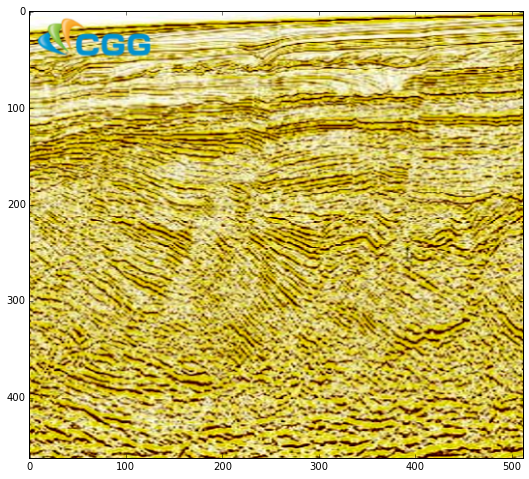

In [24]:
# Get the image
link = images.loc[images['image_id']==image_id].link[2]
f = urllib.request.urlopen(link)
img = Image.open(f)

plt.figure(figsize=(12,8))
plt.imshow(img)

for line in these_lines:
    x, y = line.xy
    plt.plot(x, y, color='k', lw=3, alpha=0.75)

plt.show()

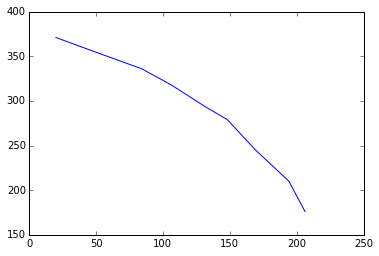

In [35]:
x, y = mls[0].xy
plt.plot(x, y)

In [36]:
h = images.loc[images['image_id']==image_id].height[2]
w = images.loc[images['image_id']==image_id].width[2]
h, w

(465, 514)

## Users

In [37]:
u = pt.users()
u[:2]

[{'biography': '',
  'education': '',
  'email': 'macdonald.adam@gmail.com',
  'environment': '',
  'experience': None,
  'linkedin': None,
  'location': None,
  'nickname': 'macdonald.adam',
  'profession': '',
  'user_id': '109007604140211794198'},
 {'biography': '',
  'education': '',
  'email': 'jonareskaar@gmail.com',
  'environment': '',
  'experience': None,
  'linkedin': None,
  'location': None,
  'nickname': 'jonareskaar',
  'profession': '',
  'user_id': '103238672542759555101'}]

In [40]:
pt.users(user_id='103238672542759555101')

{'biography': '',
 'education': '',
 'email': 'jonareskaar@gmail.com',
 'environment': '',
 'experience': None,
 'linkedin': None,
 'location': None,
 'nickname': 'jonareskaar',
 'profession': '',
 'user_id': '103238672542759555101'}

## Picks

In [11]:
image_id = 5910974510923776
p = pt.picks(image_id=image_id)
picks = pd.DataFrame(p)

In [12]:
picks.head()

,cohort,date,ip_addr,picks,user_id
0,None,2015-10-09 17:51:09.582195,127.0.0.1,"[[230, 277, 0], [504, 346, 0], [554, 535, 0], ...",185804764220139124118
